Epoch 1/400
50/50 [==============================] - 0s 1ms/step - loss: 0.4887
Epoch 2/400
50/50 [==============================] - 0s 1ms/step - loss: 0.4253
Epoch 3/400
50/50 [==============================] - 0s 997us/step - loss: 0.3869
Epoch 4/400
50/50 [==============================] - 0s 997us/step - loss: 0.3569
Epoch 5/400
50/50 [==============================] - 0s 977us/step - loss: 0.3329
Epoch 6/400
50/50 [==============================] - 0s 957us/step - loss: 0.3121
Epoch 7/400
50/50 [==============================] - 0s 997us/step - loss: 0.2928
Epoch 8/400
50/50 [==============================] - 0s 1ms/step - loss: 0.2748
Epoch 9/400
50/50 [==============================] - 0s 997us/step - loss: 0.2572
Epoch 10/400
50/50 [==============================] - 0s 977us/step - loss: 0.2413
Epoch 11/400
50/50 [==============================] - 0s 997us/step - loss: 0.2256
Epoch 12/400
50/50 [==============================] - 0s 997us/step - loss: 0.2125
Epoch 13/400
50/50 

50/50 [==============================] - 0s 1ms/step - loss: 0.1597
Epoch 102/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 103/400
50/50 [==============================] - 0s 997us/step - loss: 0.1595
Epoch 104/400
50/50 [==============================] - 0s 898us/step - loss: 0.1592
Epoch 105/400
50/50 [==============================] - 0s 910us/step - loss: 0.1594
Epoch 106/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1592
Epoch 107/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1592
Epoch 108/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 109/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1588
Epoch 110/400
50/50 [==============================] - 0s 2ms/step - loss: 0.1595A: 0s - loss: 0.15
Epoch 111/400
50/50 [==============================] - 0s 2ms/step - loss: 0.1595A: 0s - loss: 0.162
Epoch 112/400
50/50 [==============================] - 0s 1ms/step - 

50/50 [==============================] - 0s 1ms/step - loss: 0.1472
Epoch 201/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1467
Epoch 202/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1464
Epoch 203/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1455
Epoch 204/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1454
Epoch 205/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1452
Epoch 206/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1451
Epoch 207/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1450
Epoch 208/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1443
Epoch 209/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1439
Epoch 210/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1433
Epoch 211/400
50/50 [==============================] - 0s 1ms/step - loss: 0.1434
Epoch 212/400
50/50 [=========

50/50 [==============================] - 0s 1ms/step - loss: 0.0208
Epoch 396/400
50/50 [==============================] - 0s 1ms/step - loss: 0.0206A: 0s - loss: 0.020
Epoch 397/400
50/50 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 398/400
50/50 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 399/400
50/50 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 400/400
50/50 [==============================] - 0s 977us/step - loss: 0.0196


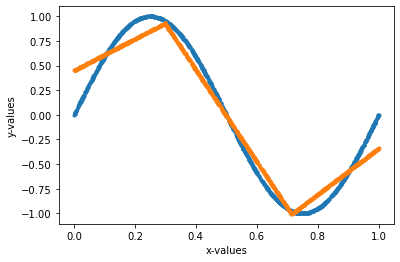

In [3]:
#generating random data from a linear function and adding noise
#generate x-values uniformly inside the interval [0,1]
import numpy as np
X_data = np.random.uniform(0, 1, 1000)

#generate values of the function f(x) = x^2
y_data = np.sin(2*np.pi*X_data)


#build the model
#import the necessary functions from the tensorflow library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

#build the model with 2^N nodes in one hidden layer.
N=4

model = Sequential()
model.add(Dense(2**N, input_dim=1, activation='relu', use_bias=True))
model.add(Dense(1, activation='linear', use_bias=False))


#compile the model
model.compile(loss='mean_squared_error', optimizer='SGD')

#fit the model to our data
model.fit(X_data, y_data, epochs=400, batch_size=20)


#evaluate the model
predictions = model.predict(X_data)

#now note that y_data is a row vector, while predictions is a column vector. So first we have to adjust the format:
#y_data = [.. , .. , .. , ...]  while 
#predictions = [[..],[..],[..], ...]

#let predictions have the same format as y_data
[predictions] = predictions.transpose()

import matplotlib.pyplot as plt

plt.clf()
plt.plot(X_data,y_data,'.')
plt.plot(X_data,predictions,'.')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()


#if you are interested, here is some code which I used to further analyze the weights of the NN:

#get the weights of the NN
#optimized_weights = model.get_weights()

#note: There are 4 blocks of variables (one for every type of weight); in every block there are as many weights 
#as there are nodes
#for a node i we have alpha_i * ReLU(beta_i * x + b_i) + h_i (for i=0 to 2^n-1)

#block 0: all beta_i = optimized_weights[0][0][i]
#block 1: all b_i (bias of the first step in NN) = optimized_weights[1][i]
#block 2: all alpha_i = optimized_weights[2][i][0]
#CURRENTLY NOT ACTIVATED: block 3: all h_i = optimized_weights[3][i]
#print(model.get_weights()) 

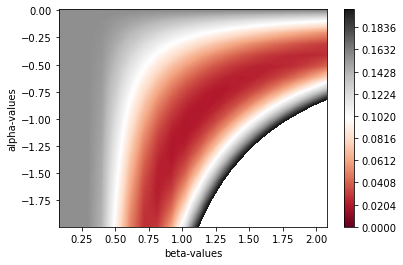

In [4]:
#draw the contour plot

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.losses import MeanSquaredError

#calculate loss axis
mse = keras.losses.MeanSquaredError()


#decide how many points we want to plot on each axis
n = 20

#decide which node we should modify
node_index = 0

#which values of weights did we optimize to 
optimized_weights = model.get_weights()
optimized_beta = optimized_weights[0][0][node_index]
optimized_alpha = optimized_weights[2][node_index][0]

#look at area around the optimized parameters
beta_axis = np.linspace(optimized_beta - 1,optimized_beta + 1,n)
alpha_axis = np.linspace(optimized_alpha - 1, optimized_alpha + 1,n)

Beta_axis, Alpha_axis = np.array(np.meshgrid(beta_axis, alpha_axis))

#Create a new variable with the same structure as Beta_axis
import copy
Loss_axis = copy.deepcopy(Beta_axis)


for i in range(n):
    for j in range(n):
    
        beta_plot = Beta_axis[i][j]
        alpha_plot = Alpha_axis[i][j]
        
        weights = copy.deepcopy(optimized_weights)
        
        weights[0][0][node_index] = beta_plot
        weights[2][node_index][0] = alpha_plot
        
        model.set_weights(weights)
        
        y_pred = model.predict(X_data)
        
        
        #now note that y_data is a row vector, while predictions is a column vector. So first we have to adjust the format:
        #y_data = [.. , .. , .. , ...]  while 
        #predictions = [[..],[..],[..], ...]

        #let predictions have the same format as y_data
        [y_pred] = y_pred.transpose()
        
       
        Loss_axis[i][j] = mse(y_data, y_pred).numpy()
        

#draw the contour plot
vmin = 0
vmax = 0.2
levels = np.linspace(vmin, vmax, 500 + 1)

plt.ylabel('alpha-values')
plt.xlabel('beta-values')
plt.contourf(Beta_axis, Alpha_axis,Loss_axis , 500, cmap='RdGy', levels=levels)
plt.colorbar()

